#Homework 9: The Goliath
In this assignment, you will be working with many different datasets and using as many tools as you can to create reasonable predictions.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing
from datetime import datetime
from sklearn.metrics import mean_squared_error



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Problem 1: Classification

For each graph given, determine (1) whether or not there is a trend and (2) whether there is no seasonality, additive seasonality, or multiplicative seasonality.

*Do not run the following two blocks of code. They are used to embed the image into this file.*

In [0]:
# DO NOT RUN THIS CODE
# from google.colab import files
# uploaded = files.upload()

Saving Problem 1.JPG to Problem 1.JPG


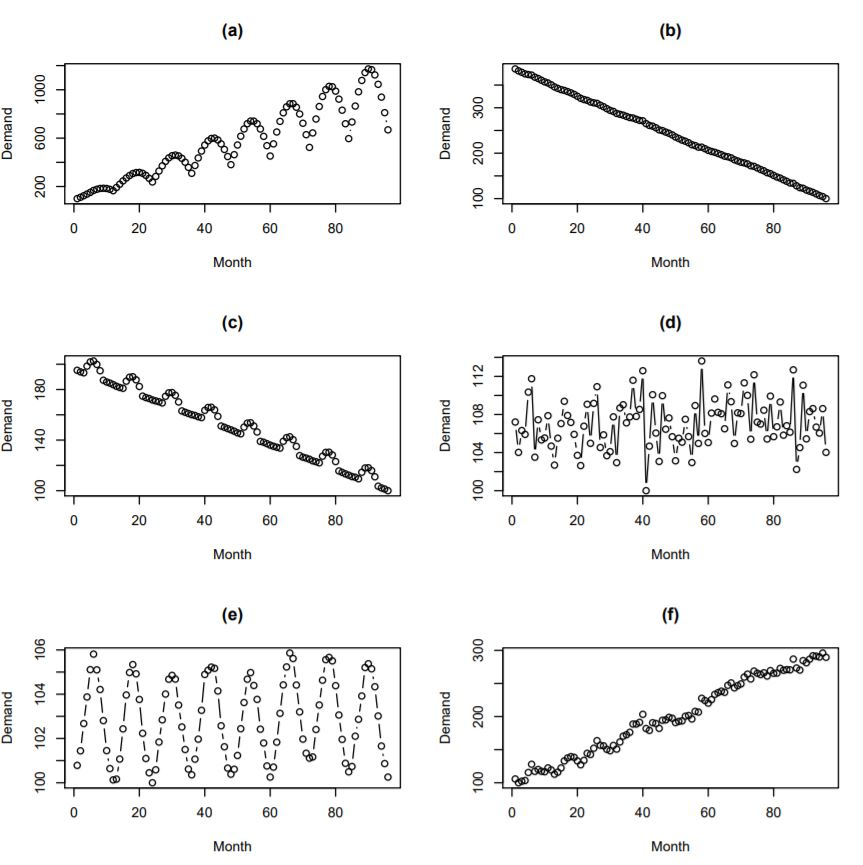

In [0]:
# DO NOT RUN THIS CODE
# from IPython.display import Image
# Image("Problem 1.JPG", width = 700)

**Answer here.**

a) trend, multiplicative seasonality

b) trend, no seasonality

c) trend, additive seasonality

d) no trend, no seasonality

e) no trend, additive seasonality

f) trend, no seasonality

##Problem 2: Calculations

The Holt-Winters additive forecasting method was applied to 10 years of quarterly data.

Given:

 $a_{40} = 20$

 $b_{40} = 0.7$
 
 $S_{40} = 0.9$
 
 $S_{39} = 0.4$
 
 $S_{38} = −0.3$
 
 $S_{37} = −0.8$
 
Find the forecasts for the next four quarters.

The forecast for the 41st quarter is 20 + 0.7 − 0.8.

The forecast for the 42nd quarter is 20 + (2)(0.7) − 0.3.

The forecast for the 43rd quarter is 20 + (3)(0.7) + 0.4.

The forecast for the 44th quarter is 20 + (4)(0.7) + 0.9.

##Problem 2: Simple Exponential Smoothing

Load the auto-sales.csv data into a variable. And then extract on the "AUTOSALE" column into an array.

In [0]:
# YOUR CODE HERE
auto = pd.read_csv("auto-sales.csv")
auto_data = np.array(auto["AUTOSALE"])

Print the date column to see what is weird about the format.

In [0]:
# YOUR CODE HERE
auto["DATE"][:-1]
## our data here looks weird. seems to be the year followed by a decimal representation of the month where .00 = january.

0      1970.00
1      1970.08
2      1970.17
3      1970.25
4      1970.33
5      1970.42
6      1970.50
7      1970.58
8      1970.67
9      1970.75
10     1970.83
11     1970.92
12     1971.00
13     1971.08
14     1971.17
15     1971.25
16     1971.33
17     1971.42
18     1971.50
19     1971.58
20     1971.67
21     1971.75
22     1971.83
23     1971.92
24     1972.00
25     1972.08
26     1972.17
27     1972.25
28     1972.33
29     1972.42
        ...   
310    1995.83
311    1995.92
312    1996.00
313    1996.08
314    1996.17
315    1996.25
316    1996.33
317    1996.42
318    1996.50
319    1996.58
320    1996.67
321    1996.75
322    1996.83
323    1996.92
324    1997.00
325    1997.08
326    1997.17
327    1997.25
328    1997.33
329    1997.42
330    1997.50
331    1997.58
332    1997.67
333    1997.75
334    1997.83
335    1997.92
336    1998.00
337    1998.08
338    1998.17
339    1998.25
Name: DATE, Length: 340, dtype: float64

Use pd.date_range to create a useable date range for the rest of this problem.

Documention for this function can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

We can assume that the dates begin on the first of each month.

In [0]:
# YOUR CODE HERE
auto_date = pd.date_range(start = '1/1/1970', end = '5/1/1998', freq = 'MS')

Now, combine the AUTOSALE data and the created date range into one dataframe.

In [0]:
# YOUR CODE HERE
auto_ts = pd.Series(auto_data,auto_date)

Split the data insto a training set and a test set. Have the first 70% of the data be in the training set.

In [0]:
# YOUR CODE HERE
auto_train = auto_ts.iloc[:int(.70*len(auto_ts))]
auto_test = auto_ts.iloc[int(.70*len(auto_ts))+1:]

NameError: ignored

Fit a simple exponential model to the training data.

In [0]:
# YOUR CODE HERE
fit_simpex = SimpleExpSmoothing(auto_train).fit()

Plot the entire dataset (training and test data).

Plot the fitted simple exponential model values on top of the training data.

Plot the predicted values on top of the test data.

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


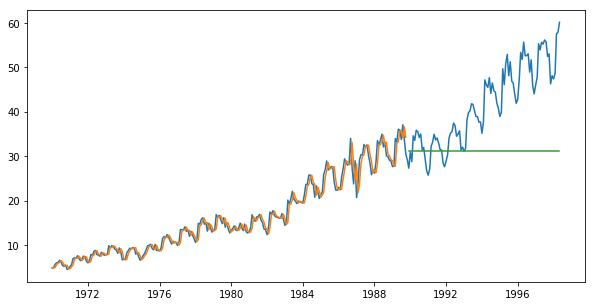

In [0]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(auto_date[:len(auto_train)],fit_simpex.fittedvalues.iloc[:])
plt.plot(auto_date[len(auto_train)+1:],fit_simpex.forecast(len(auto_test)).iloc[:])
plt.show()

##Problem 3: Holt's Linear Exponential

Fit a Holt Linear model onto the auto training data.

In [0]:
# YOUR CODE HERE
fit_double_exp = Holt(auto_train).fit()

Plot the entire dataset (training and test data).

Plot the fitted simple exponential model values on top of the training data.

Plot the predicted values on top of the test data.

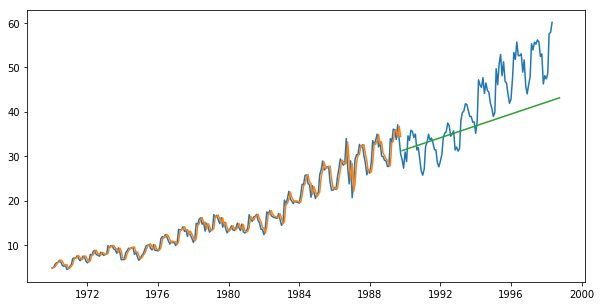

In [0]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(auto_ts)
plt.plot(fit_double_exp.fittedvalues)
plt.plot(fit_double_exp.forecast(108))

Now let's try creating some approximate confidence intervals around our predicted values.

We will use the standard deviation of the fitted values for the required sigma. To account for uncertainty, we will increase this value at each step by multiplying the base standard deviation by sqrt(k+1) where k is the integer portion of (h-1)/m where h is the increased step and m is the seasonal period length.

First, find the sigma value for the training dataset. And the use that to construct a 95% confidence interval for each data point in the test dataset.

In [0]:
# YOUR CODE HERE
sig = np.std(fit_double_exp.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

Next, find the forecasted values for the testing data.

In [0]:
# YOUR CODE HER
double_forecast = fit_double_exp.forecast(len(auto_test))

Finally, you want to plot the entire dataset, the forecasted values for the test set, and the confidence interval. You can get the confidence interval by adding and subtracting the previous CI values found from the forecasted values.

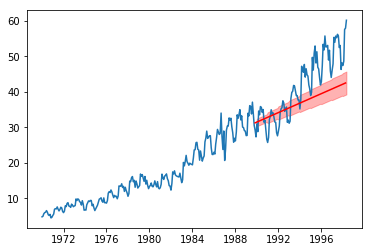

In [0]:
# YOUR CODE HERE
plt.plot(auto_ts)
plt.plot(double_forecast, color = 'r')
plt.fill_between(auto_test.index[:], double_forecast+sigmas, double_forecast-sigmas, alpha = .3, color = 'r')

Would you say that our model accurately captures the data? If not, why do you think the model falls short?

**Answer here.**

##Problem 4: Holt-Winters Model

This model can incorporate both trend analysis as well as seasonality analysis.

Why is seasonality analysis important, especially when working with sales data?

**Answer here.**

In [0]:
##fit 9 triple exponenital smoothing (holt-winters) models, by changing the values of trend and seasonal.
# each can take the value None, 'mul', or 'add'. If you get an error about the model being unable to detect seasonality
#you may need to give seasonal_periods a number equal to the length of each season. 
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html?highlight=exponential%20smoothing#statsmodels.tsa.holtwinters.ExponentialSmoothing
##What is the MSE value of each model?
##Plot the original data, fitted values, predicted values, and confidence interval of the best mod


When using the Holt-Winters method through the ExponentialSmoothing() function, you will need to specify the trend and the seasonality: none, 'mul', or 'add'.

Sometimes it will automatically detect the length of periods, but if it cannot, it will throw and error and you will also have to specify that manually. (Usually monthly data has a period of 12.)

Here is further documentation: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html?highlight=exponential%20smoothing#statsmodels.tsa.holtwinters.ExponentialSmoothing

Create and fit various combinations of trends and seasonalities to determine the best model. (There are 9 possible combinations.)

What is the MSE value of each model?

In [0]:
# YOUR CODE HERE
## Solutions are the following 9 code blocks.

**Answer here.**

MSE Values:

No trend, No seasonality: 186.13

Additive trend, No easonality: 58.24

Multiplicative trend, No seasonality: 62.39

No trend, Additive seasonality: 140.59

Additive trend, Additive easonality: 34.48

Multiplicative trend, Additive seasonality: 24.71

No trend, Multiplicative seasonality: 159.00

Additive trend, Multiplicative easonality: 29.60

Multiplicative trend, Multiplicative seasonality: 45.74

#

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


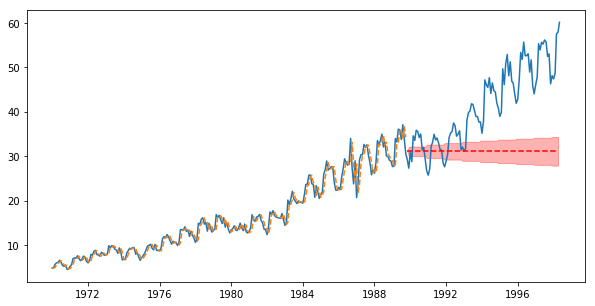

186.13076413308505 3.22386415526452


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train).fit()
preds = fit_holt2.forecast(len(auto_test))

sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


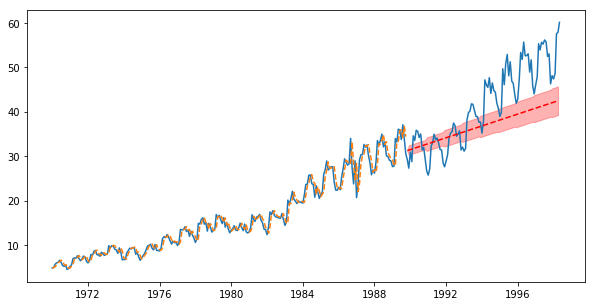

58.24083080163493 3.2234967100706324


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'add' ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


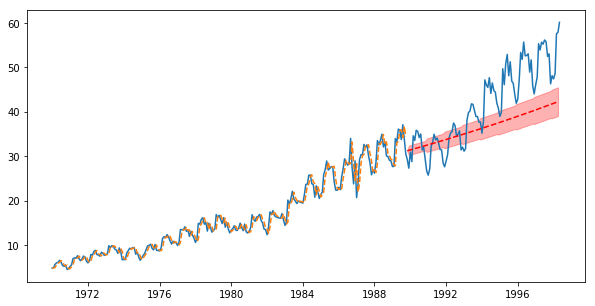

62.39501353924565 3.2349684552325213


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'mul' ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


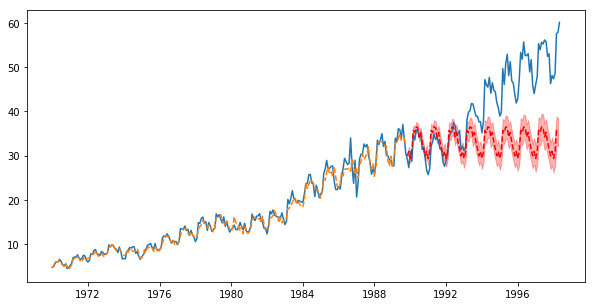

140.58952559209868 3.1718074477539053


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, seasonal = 'add', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


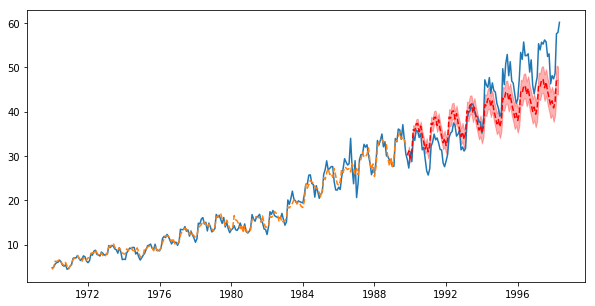

34.482943590025194 3.1583653909442586


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'add', seasonal = 'add', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


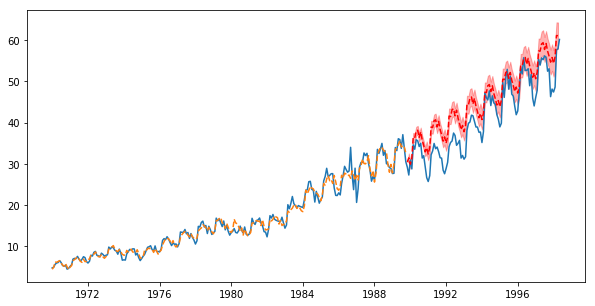

24.71457037214528 3.201161662087304


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'mul', seasonal = 'add', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


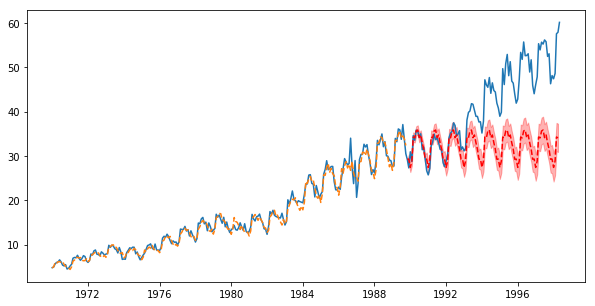

159.00338072927153 3.1985291730166576


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = None, seasonal = 'mul', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


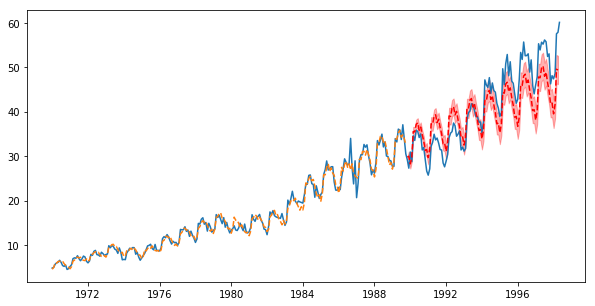

29.595040365633924 3.2080477406789756


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'add', seasonal = 'mul', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


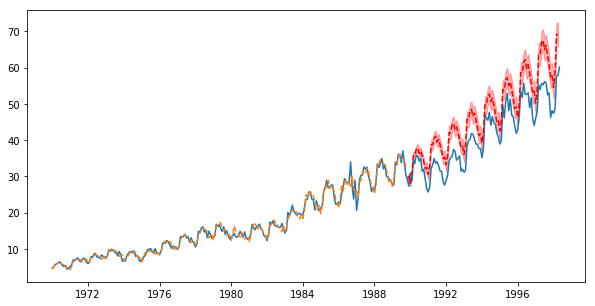

45.744858640319926 3.254098036640795


In [0]:
fit_holt2 = ExponentialSmoothing(auto_train, trend = 'mul', seasonal = 'mul', seasonal_periods = 12 ).fit()
preds = fit_holt2.forecast(len(auto_test))
sig = np.std(fit_holt2.fittedvalues)/np.sqrt(len(auto_train))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(auto_test))]

plt.figure(figsize=(10,5))
plt.plot(auto_date,auto_data)
plt.plot(fit_holt2.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

print(mean_squared_error(preds,auto_test), sigmas[-1])

Which model performed the best? Why?

**Answer here.**

What are some possible counfounding variables that make this dataset not perfect?

**Answer here.**

Finally, let's try fitting a log correction to the data instead of inflation
take the natural log of the data and compute a model using the attributes of your best non-corrected model.

How does this model compare to the others?

Split this data into 80% train and 20% test.

In [0]:
# YOUR CODE HERE
logts = pd.Series(np.log(auto_data),auto_date)
log_train = logts.iloc[:int(.80*len(logts))]
log_test = logts.iloc[int(.80*len(logts)):]

Use the best trend/seasonality model to fit this data.

In [0]:
# YOUR CODE HERE
log_fit = ExponentialSmoothing(log_train, trend = 'mul', seasonal = 'add', seasonal_periods = 12 ).fit()

Create the predictions and the 95% confidence interval as you had done for the previous data.

In [0]:
# YOUR CODE HERE
preds = log_fit.forecast(len(log_test))
sig = np.std(log_fit.fittedvalues)/np.sqrt(len(log_test))
sigmas = [sig*1.96*np.sqrt(np.floor((i-1)/12)+1)for i in range(len(log_test))]

Plot the data as well as the predictions and 95% confidence interval.

In [0]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(logts)
plt.plot(log_fit.fittedvalues,"--")
plt.plot(preds, "--", color = 'r')
plt.fill_between(preds.index[:],preds+sigmas, preds-sigmas, alpha = .3, color = 'r')
plt.show()

How does this model compare to the non-corrected best model?

Try changing the split size and compare that model to the one using an 80-20 split.

**Answer here.**

##Problem 5: Gas Prices

Read in and process the gasoline dataset however you see fit.

In [0]:
# YOUR CODE HERE
gas = pd.read_csv("/Users/siddharthkantamneni/Documents/Senior_Semester/Spring 2020/Hw9 and Rec12/gasoline-data.csv")
gas_date = [datetime.strptime(date,"%b-%y").date() for date in gas["Date"]]
gas_data = np.array(gas["Data"])
gas_ts = pd.Series(gas_data, gas_date)

Plot the time series data.

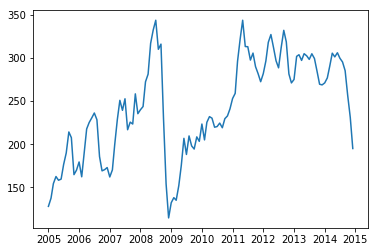

In [0]:
# YOUR CODE HERE
plt.plot(gas_ts)

Is there any apparent trend in the data? How about seasonality?

Try fitting any model(s) you'd like, and get an estimate for the price of gas on July 2014. Use the 1st 100 points as training data.

Plot the original data, your model's fitted data, and your models's predictions with confidence intervals.

Play around and try to create the best model you can! Leave all of your test models in the notebook if you have any. Have fun with it!

In [0]:
gas_train = gas_ts.iloc[:100]
gas_test = gas_ts.iloc[100:]

In [0]:
gas1 = Holt(gas_train).fit()

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


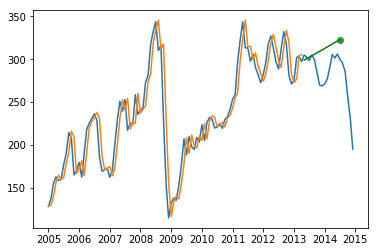

322.8515504789879


In [0]:
plt.plot(gas_ts)
plt.plot(gas1.fittedvalues)
plt.plot(gas1.forecast(15).index[14],gas1.forecast(15).iloc[14], marker = 'o')
plt.plot(gas1.forecast(15), color = 'g')
plt.show()
print(gas1.forecast(15).iloc[14])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


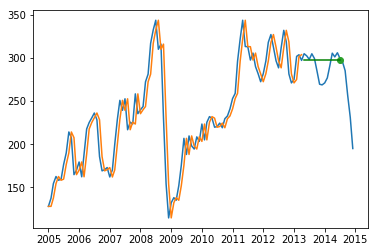

297.2


In [0]:
gas2 = ExponentialSmoothing(gas_train).fit()
plt.plot(gas_ts)
plt.plot(gas2.fittedvalues)
plt.plot(gas2.forecast(15).index[14], gas2.forecast(15).iloc[14], marker = 'o')
plt.plot(gas2.forecast(15), color = 'g')
plt.show()
print(gas2.forecast(15).iloc[14])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


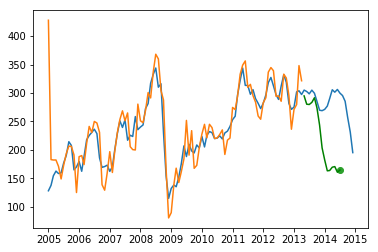

164.405674341397


In [0]:
gas3 = ExponentialSmoothing(gas_train, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
plt.plot(gas_ts)
plt.plot(gas3.fittedvalues)
plt.plot(gas3.forecast(15).index[14], gas3.forecast(15).iloc[14], marker = 'o')
plt.plot(gas3.forecast(15), color = 'g')
plt.show()
print(gas3.forecast(15).iloc[14])

Which model most accurately estimated the value on July 2014?

Which model best predicted the path of the prices leading up
to July 2014?

**Answer here.**

Finally, compute the growth rate from year to year by dividing the price of gas by that of the previous year

Compute any model you'd like on the data, with a training set of the 1st 100 data points. Get an estimate of the return on July 2014.

How does this model compare to the ones that used price data?

In [0]:
# YOUR CODE HERE
YoY = gas_data[1:]/gas_data[:119]
returns = pd.Series(YoY, gas_date[:119])

gas4 = ExponentialSmoothing(returns.iloc[:100], trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
plt.plot(returns)
plt.plot(gas4.fittedvalues.index[:], gas4.fittedvalues.iloc[:])
plt.plot(gas4.forecast(19), color = 'g')
plt.show()

print(gas4.forecast(19).iloc[14])

**Answer here.**

Would you trust the price model or the returns model more?

Why?

**Answer here.**